# Justin Keener
## Assignment 2: Gamma Correction, Histogram Equalization, and Histogram Matching
## EE 4490: Digitial Image Pattern 
## 02/28/2018

In [17]:
%matplotlib inline

import cv2 
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

In [18]:
# Creates the path for the first image and reads the image into a variable
img_path = "/Users/justinkeener/Desktop/Digital-Image-Class/images/tree.JPG"
img = cv2.imread(img_path)

# Creathes the path for the second image and reads the image into a variable
img2_path = "/Users/justinkeener/Desktop/Digital-Image-Class/images/deer.JPG"
img2 = cv2.imread(img2_path,0)

# Creates the path for the third image, reads the image into a variable, and converts the image to RGB
img3_path = "/Users/justinkeener/Desktop/Digital-Image-Class/images/peacoke feather.JPG"
img3 = cv2.imread(img3_path)
RGB_img = cv2.cvtColor(img3, cv2.COLOR_BGR2RGB)

#Creates the path for the fourth image, reads the image into a variable, and converts it to grayscale image
img4_path = '/Users/justinkeener/Desktop/Digital-Image-Class/images/keanu karate.jpg'
img4 = cv2.imread(img4_path,0)

# Creats the path for the template image, reads the template image into a variable, and converts it to grayscale image
template_path = '/Users/justinkeener/Desktop/Digital-Image-Class/images/template.jpg'
template = cv2.imread(template_path,0)

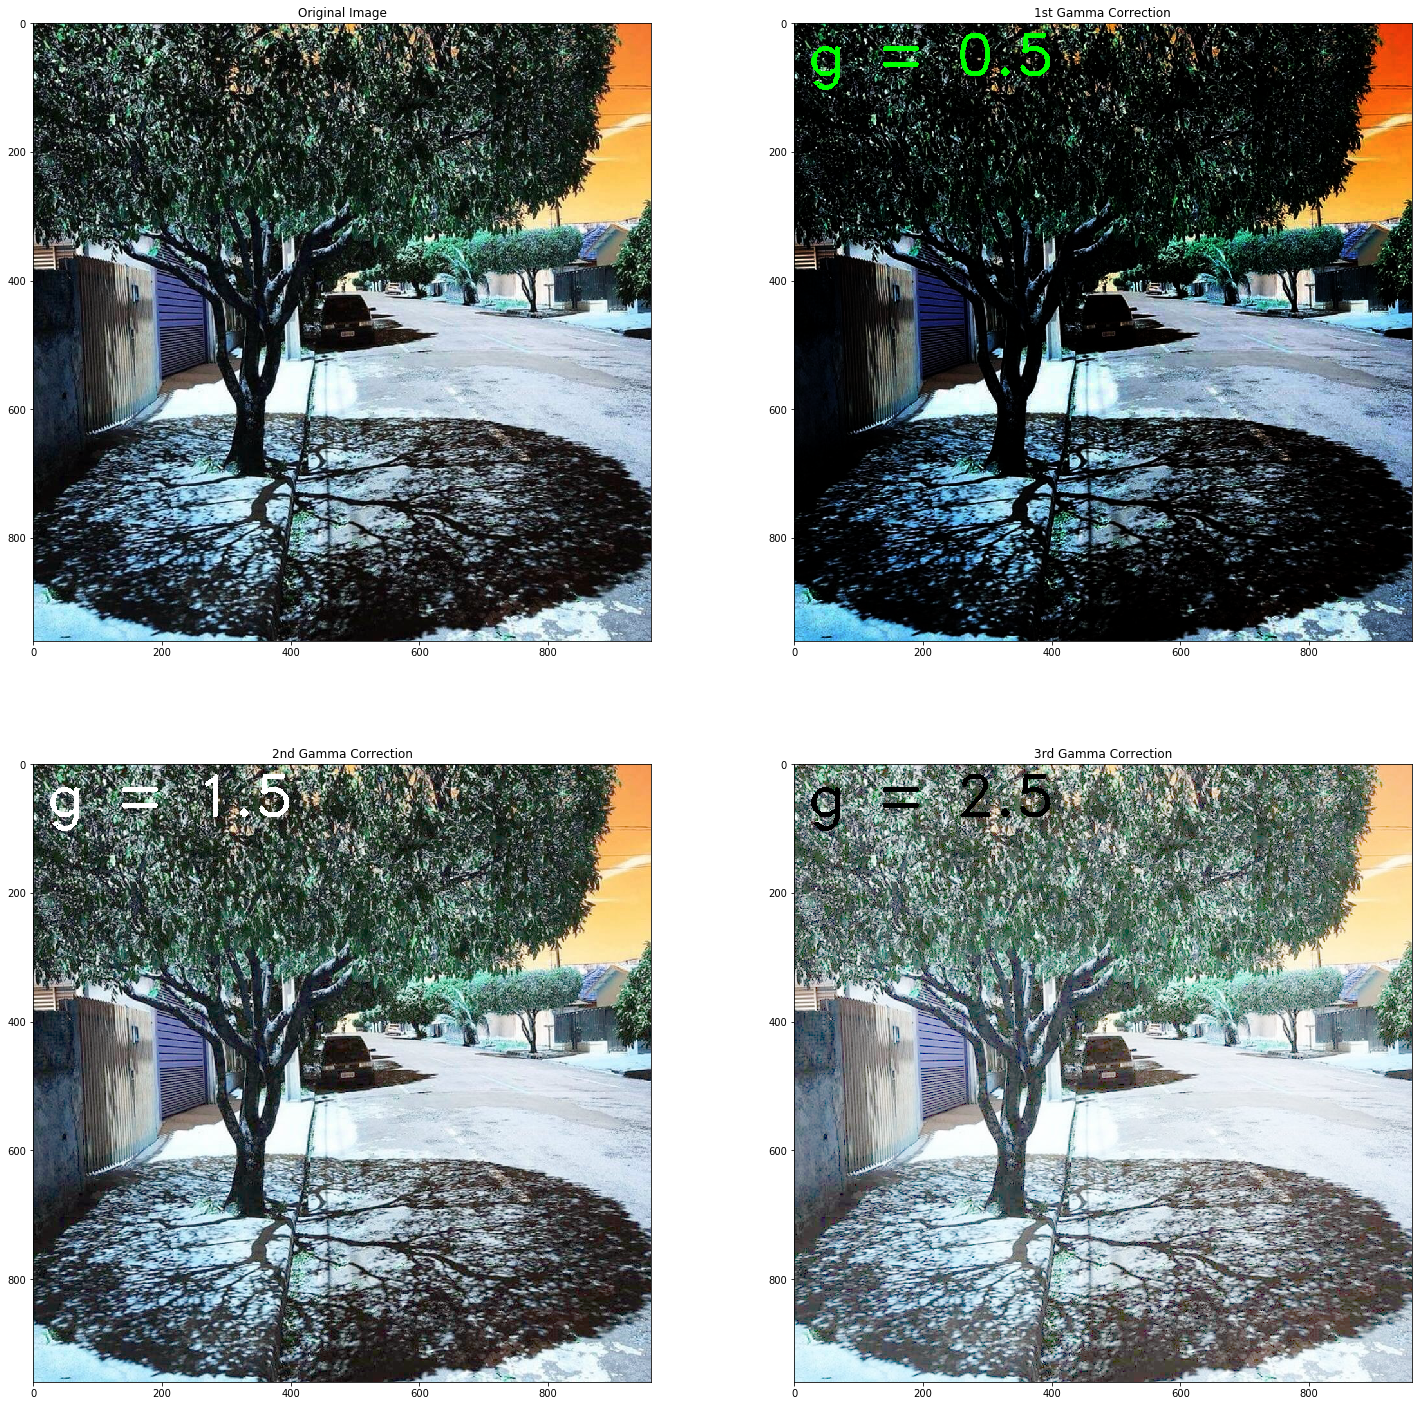

In [19]:
""" ------Gamma Correction------ 

    Parameters: img, gamma
    
    Description: 
    - Function adjust_gamma maps the output image pixels to be stored in a lookup table based on the original image pixel values.
    - invGamma calculates the inverse gamma that is applied to counter the gamma value generated by the computer screen.
    - Variable table traverses through input pixel to calculate each pixel for output image then those
      values are stored in a lookup table.
    - np.arange ranges the pixels from 0 to 255
    - for loop evenly spaces the pixels in a table to range from interval [0 to 255] and ensures the table is unsigned 8bit

    O = (I/255)^(gamma) = mapped output values from input image pixel values
"""

def adjust_gamma(img, gamma):
    invGamma = 1.0/gamma
    table  = np.array([((i / 255.0) ** invGamma) * 255
        for i in np.arange(0,256)]).astype("uint8")
    return cv2.LUT(img,table)

# Plots and scales to enlarge the original image
plt.figure(figsize=(25,25))
plt.subplot(221), plt.imshow(img),plt.title("Original Image")

# Calls the original image and gamma value to the adjust_gamma function for gamma correction 
correction1 = adjust_gamma(img,0.5)

# Plots a output image with a 0.5 gamma to darken the original image
plt.subplot(222),plt.imshow(cv2.putText(correction1, "g = {}".format(0.5),(20,80),cv2.FONT_HERSHEY_DUPLEX, 3.0, (0, 255, 0), 3))
plt.title("1st Gamma Correction")  

# Plots another output image with a 1.5 gamma to brighten the original image
correction2 = adjust_gamma(img,1.5)
plt.subplot(223),plt.imshow(cv2.putText(correction2, "g = {}".format(1.5),(20,80),cv2.FONT_HERSHEY_DUPLEX, 3.0, (255, 255, 255), 3))
plt.title("2nd Gamma Correction") 

# Plots the last output image with a 2.5 gamma to incredibly increase the brightness of the original image
correction3 = adjust_gamma(img,2.5)
plt.subplot(224),plt.imshow(cv2.putText(correction3, "g = {}".format(2.5),(20,80),cv2.FONT_HERSHEY_DUPLEX, 3.0, (0, 0, 0), 3))
plt.title("3rd Gamma Correction")
plt.show()

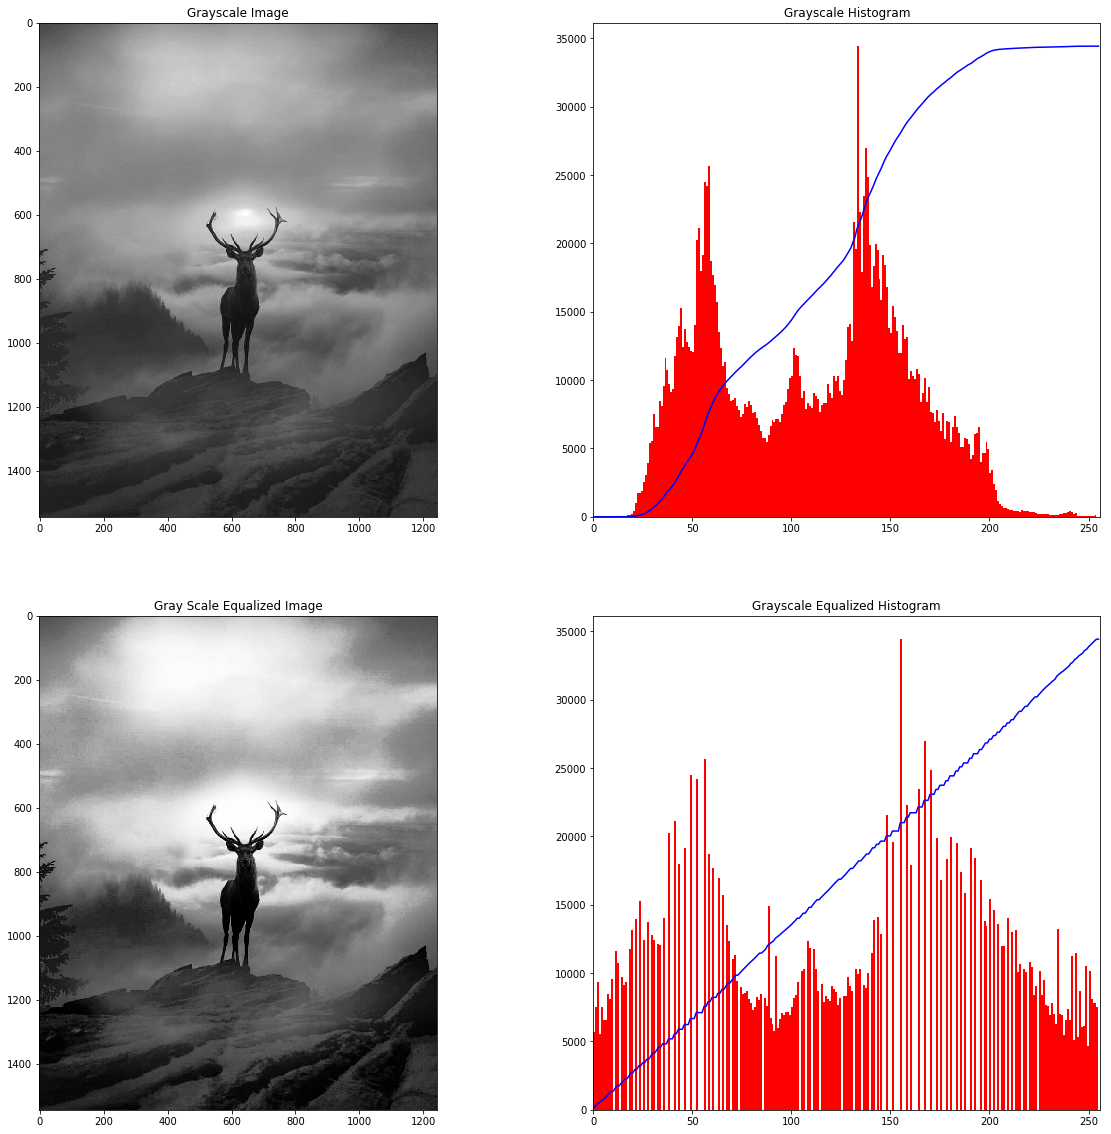

In [20]:
""" ------Histogram Equalization for Grayscale Image------ """

# unpacks the histogram data into hist and the number of bins from 0 to 256 into variable bin
hist,bins = np.histogram(img2.flatten(),256,[0,256])

# Calculates the cdf probability for the histogram
cdf = hist.cumsum()

# Calulates the cdf probability to be normalized to [0,255]
cdf_normalized = cdf * hist.max()/ cdf.max()

# Plots the gray scale image next to the histogram
plt.figure(figsize= (20,20))
plt.subplot(221),plt.imshow(img2, cmap = 'gray'),plt.title("Grayscale Image")
plt.subplot(222),plt.plot(cdf_normalized, color = 'b'),plt.hist(img2.flatten(),256,[0,256], color = 'r'),plt.xlim([0,256]),plt.title("Grayscale Histogram")

# Returns the masked values of the cdf curve except for 0
cdf_m = np.ma.masked_equal(cdf,0)

# General Histogram Equalization formula: h(v) = ((cdf(v)-cdfmin)/((M x N) - 1) x (L-1)
cdf_m = (cdf_m - cdf_m.min())*255/(cdf_m.max()-cdf_m.min())

# Returns cdf to have the masked values of cdf_m replaced with fill values from 1 to 255
# Equalized Histogram Transformation Function
cdf = np.ma.filled(cdf_m,0).astype('uint8')

# Transforms a new image to be an equalized image of the source image using cdf as the transform
eq_img = cdf[img2]

# Unpacks the data as one dimension for the histogram and determines the range for bins
hist,bins = np.histogram(eq_img.flatten(),256,[0,256])

# Calculates the cdf probability for the histogram
cdf = hist.cumsum()

# Calulates the cdf probability to be normalized to [0,255]
cdf_normalized = cdf * hist.max()/ cdf.max()

# Plots the grayscale image next to the equalized grayscale histogram
plt.subplot(223),plt.imshow(eq_img, cmap = 'gray'),plt.title("Gray Scale Equalized Image")
plt.subplot(224),plt.plot(cdf_normalized, color = 'b'),plt.hist(eq_img.flatten(),256,[0,256], color = 'r'),plt.xlim([0,256]),plt.title("Grayscale Equalized Histogram")

plt.show()

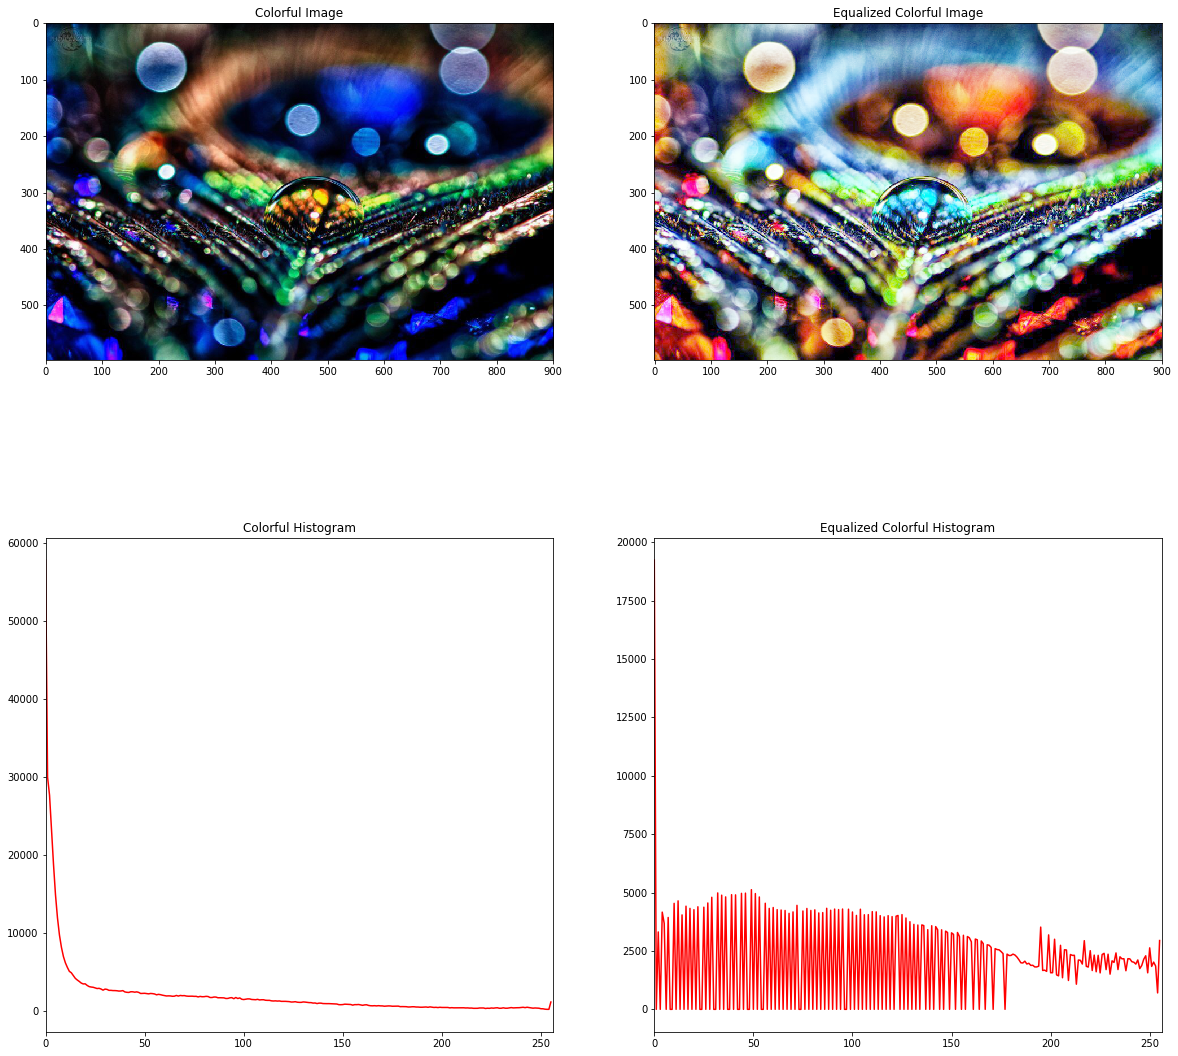

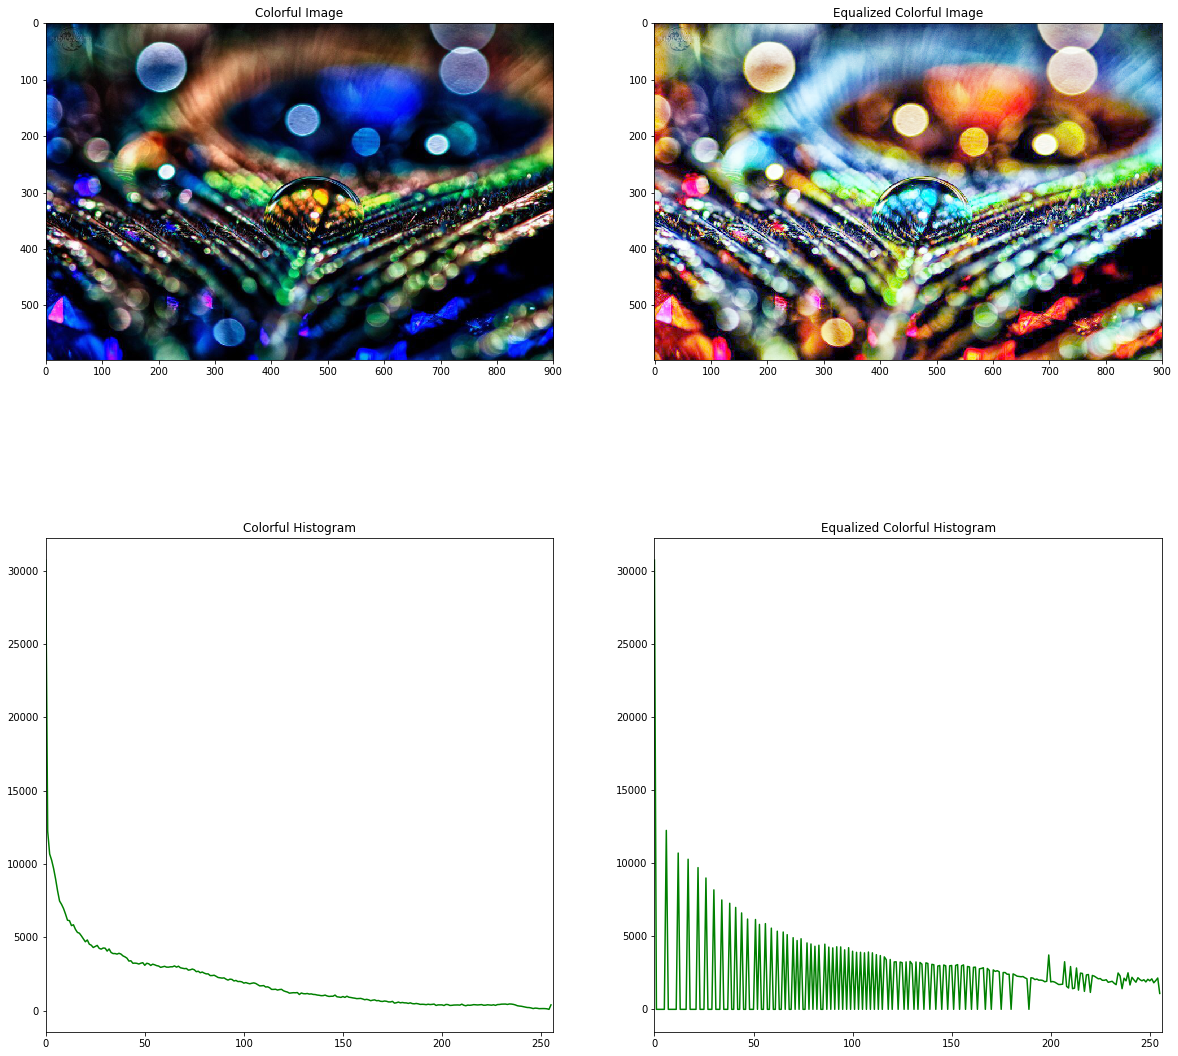

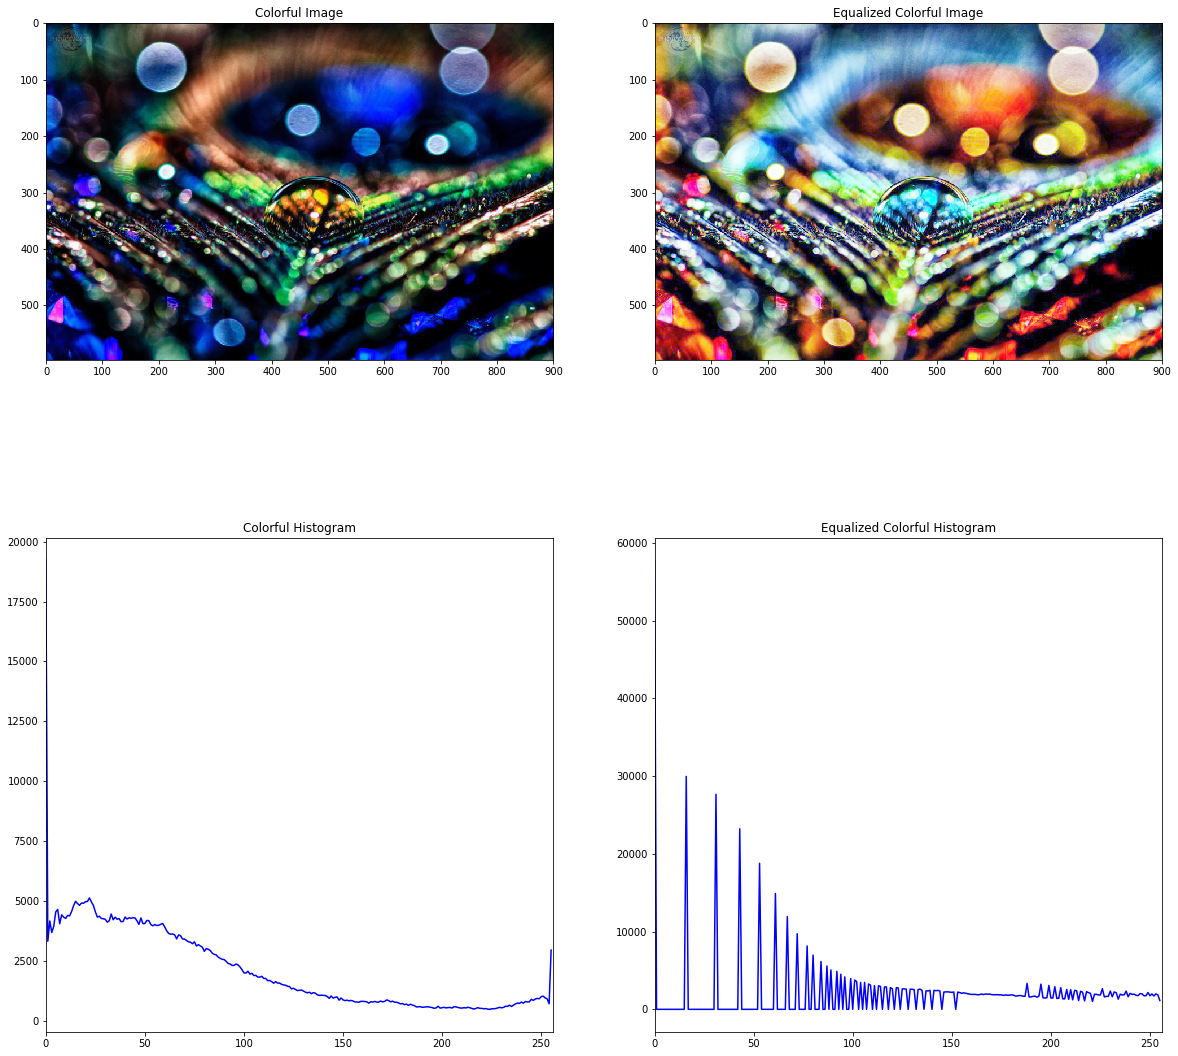

In [21]:
"""------Histogram Equalization for Colored Images------"""

# Assigns the name of RGB channels
color1 = ('r','g','b')

# Splits the RGB pixels of the image into channels 
channels = cv2.split(RGB_img)

# Creates an empty array for the equalized RGB pixels
eq_channels = []

# Equalizes the histograms of the split BGR channels and stores them into the empty array
for ch, color in zip(channels, ['R', 'G','B']):
    eq_channels.append(cv2.equalizeHist(ch))

# Creates a new image after merging the equalized RGB channels together
eq_img = cv2.merge(eq_channels)
eq_img = cv2.cvtColor(eq_img, cv2.COLOR_BGR2RGB)

# Runs through RGB channels to add color to the calculated histograms
for i, col in enumerate(color1):
    
    # Calculates the histogram of the RGB image
    hist = cv2.calcHist([RGB_img],[i],None,[256],[0,256])
    
    # Calculates the equalized histogram
    hist2 = cv2.calcHist([eq_img],[i], None, [256], [0,256])
    
    # Plots the colorful image, equalized image, colorful histogram, and equalized histogram
    plt.figure(figsize=(20,20))
    plt.subplot(221), plt.imshow(RGB_img), plt.title("Colorful Image")
    plt.subplot(222), plt.imshow(eq_img), plt.title("Equalized Colorful Image")
    plt.subplot(223), plt.plot(hist, color= col),plt.xlim([0,256]), plt.title("Colorful Histogram")
    plt.subplot(224), plt.plot(hist2, color= col),plt.xlim([0,256]),plt.title("Equalized Colorful Histogram")

plt.show()

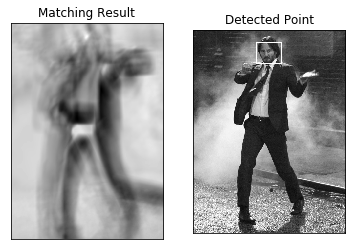

In [22]:
"""------Template Matching------"""

# Dimensions of the template
w, h = template.shape[::-1]

# Cross Correlation Method
method = ['cv2.TM_CCORR_NORMED']

# Traverses through the correlation method to determine the location of the image in the image source 
for corr_method in method:
    img5 = img4.copy()
    method = eval(corr_method)

    # Apply template Matching
    res = cv2.matchTemplate(img5,template,method)
    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)
    
    # Rectangle starts at the top left and ends at the bottom right
    # Input image is of size (WxH) and template image is of size (wxh), output image will have a size of (W-w+1, H-h+1)
    top_left = max_loc
    bottom_right = (top_left[0] + w, top_left[1] + h)

    cv2.rectangle(img5,top_left, bottom_right, 255, 2)
    
    plt.subplot(121),plt.imshow(res,cmap = 'gray')
    plt.title('Matching Result'), plt.xticks([]), plt.yticks([])
    plt.subplot(122),plt.imshow(img5,cmap = 'gray')
    plt.title('Detected Point'), plt.xticks([]), plt.yticks([])

    plt.show()

# Resources

[Gamma Correction Concept](https://docs.opencv.org/3.3.0/d3/dc1/tutorial_basic_linear_transform.html) </br>

[Gamma Correction Concept](https://www.cambridgeincolour.com/tutorials/gamma-correction.htm) </br>

[Gamma Correction Code](https://stackoverflow.com/questions/33322488/how-to-change-image-illumination-in-opencv-python) </br>

[Histogram Grayscale Equalization Concept & Code](https://docs.opencv.org/3.2.0/d5/daf/tutorial_py_histogram_equalization.html) </br>

[Histogram Grayscale Theory](https://en.wikipedia.org/wiki/Histogram_equalization) </br>

[Histogram Colorful Equalization Concept & Code](http://lmcaraig.com/image-histograms-histograms-equalization-and-histograms-comparison/) </br>

[Template Matching Code](http://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_template_matching/py_template_matching.html) </br>